In [4]:
## import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X ** 2 + 1.5 * X + 2 + np.random.randn(100,1)

Text(0, 0.5, 'Y dataset')

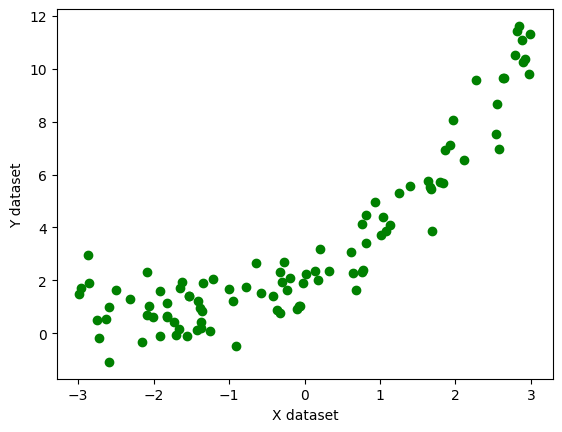

In [8]:
plt.scatter(X,y, color = 'g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
regression_1 = LinearRegression().fit(X_train, y_train)
regression_1.predict(X_test)

array([[6.86454591],
       [0.07376545],
       [1.30762396],
       [1.10903954],
       [4.1153677 ],
       [5.59932608],
       [2.83560948],
       [6.46219791],
       [6.30726208],
       [5.60687328],
       [7.09573275],
       [1.72455857],
       [5.27058725],
       [2.49347872],
       [3.96965479],
       [3.09522118],
       [1.18181742],
       [3.94359225],
       [2.18566386],
       [7.67386488]])

In [9]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regression_1.predict(X_test))
score

0.8426018131336783

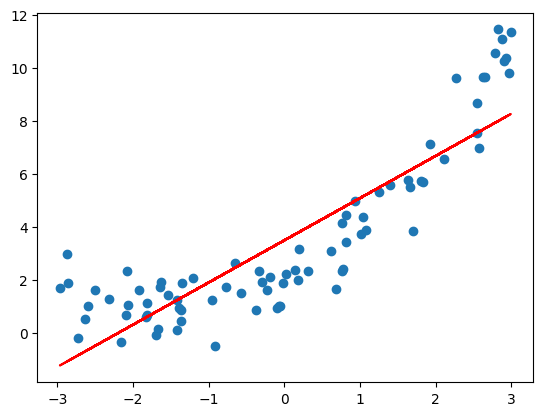

In [31]:
plt.plot(X_train, regression_1.predict(X_train), color='r')
plt.scatter(X_train, y_train)

In [10]:
## Ploynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, include_bias = True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [11]:
regression_2 = LinearRegression().fit(X_train_poly, y_train)
y_pred = regression_2.predict(X_test_poly)
from sklearn.metrics import r2_score
score_2 = r2_score(y_test, y_pred)
score_2

0.9299941243716383

In [37]:
regression_2.coef_

array([[0.        , 1.47578111, 0.48404024]])

In [38]:
regression_2.intercept_

array([1.97052307])

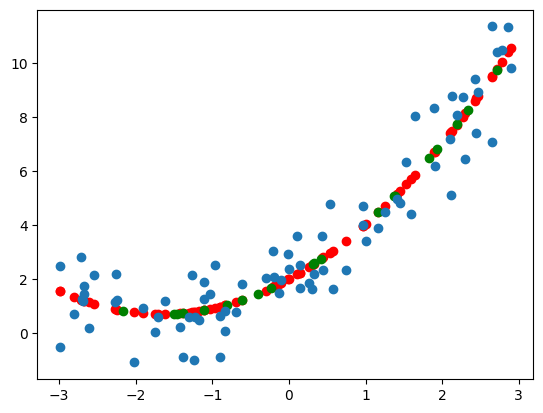

In [12]:
plt.scatter(X_train, regression_2.predict(X_train_poly), color = 'r')
#plt.scatter(X_test_poly, regression_2.predict(X_test_poly), color ='b')
plt.scatter(X_test, y_pred, color = 'g')
plt.scatter(X_train, y_train)

In [13]:
X_new = np.linspace(-3, 3, 200).reshape(200,1)
X_new_poly = poly.transform(X_new)
X_new_poly


array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

In [14]:
y_pred_new = regression_2.predict(X_new_poly)

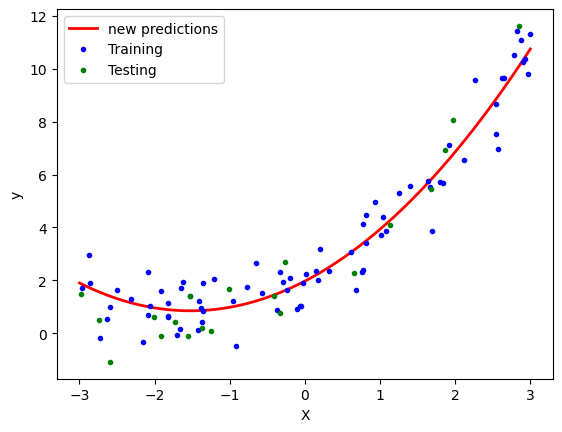

In [76]:
plt.plot(X_new, y_pred_new,  "r-", linewidth = 2,  label = 'new predictions')
plt.plot(X_train, y_train, "b.", label = "Training")
plt.plot(X_test, y_test, "g.", label = "Testing")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [1]:
from sklearn.pipeline import Pipeline

In [27]:
def pipeline(degree):
    X_new_data = np.linspace(-3, 3, 200).reshape(200,1)

    poly = PolynomialFeatures(degree = degree, include_bias = True)
    regression = LinearRegression()
    poly_features = Pipeline([
        ("poly", poly),
        ("regression", regression)
    ])
    poly_features.fit(X_train, y_train)
    y_pred_new_poly = poly_features.predict(X_new_data)

    plt.plot(X_new_data, y_pred_new_poly, "r-", label = "Degree " + str(degree), linewidth = 2)
    plt.plot(X_train, y_train, "b.", label = "Training")
    plt.plot(X_test, y_test, "g.", label = "Testing")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()
    

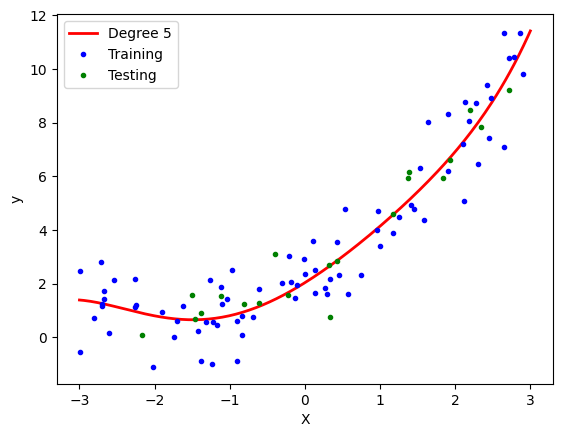

In [31]:
pipeline(5)